In [1]:
import pandas as pd
from pathlib import Path


In [3]:
from src.extract import ExtractorCSV, ExtractorExcel, ExtractorSQLite


# Transformaciones energia

In [71]:
datosEnergy = ExtractorCSV.extract(Path("./data/energy.csv"), rows=4)

datosEnergy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.856161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.675879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.050111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.233531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,53.174928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Borrar las columnas que no tienen datos importantes
datosEnergy.drop(columns=["Unnamed: 68", "Indicator Name", "Indicator Code", "Country Name"], inplace=True)

datosEnergy.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.099280,14.856161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.966589,25.675879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.323549,86.050111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.566146,31.233531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.175105,53.174928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Just want the years from 1990 to 2014, but also save the country name and country code
datosEnergy = datosEnergy[[ "Country Code"] + [str(i) for i in range(1990, 2015)]]

datosEnergy.head()

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280
1,AFE,14.365258,15.352872,14.105564,13.483070,13.232346,13.293881,12.738393,12.516603,14.875592,...,17.691273,18.472924,18.173469,18.288642,19.755338,21.162999,21.323779,21.795825,22.732604,24.966589
2,AFG,67.730496,67.980296,67.994310,68.345324,68.704512,69.037037,70.370370,72.388060,74.436090,...,74.061810,70.755750,72.000000,68.654822,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549
3,AFW,55.663149,60.318735,59.152300,57.433991,54.759548,55.337545,54.619182,54.374801,48.372273,...,44.093335,40.843210,36.936289,41.727171,41.550212,38.547084,37.703650,36.037935,35.163864,34.566146
4,AGO,86.206897,82.655246,88.701162,93.684211,93.717277,93.750000,89.980545,76.352531,80.424886,...,79.648241,80.611010,77.618900,75.409047,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105


In [ ]:
# Transpose the years, so that we have a row for each year
datosEnergy = datosEnergy.T
datosEnergy.head()

In [80]:
# Selecciona las columnas de los años 1990 a 2014
years = [str(year) for year in range(1990, 2015)]

datosEnergy["Average Electricity"] = datosEnergy[years].mean(axis=1)


# Ahora puedes mostrar solo las columnas relevantes
result = datosEnergy[["Country Code", "Average Electricity"]]

# Mostrar el resultado
result.head()

C:\Users\kenny\AppData\Local\Temp\ipykernel_20336\4097865369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosEnergy["Average Electricity"] = datosEnergy[years].mean(axis=1)


,Country Code,Average Electricity
0,ABW,2.734205
1,AFE,17.169654
2,AFG,74.388290
3,AFW,47.157185
4,AGO,74.900081


# Transformaciones Emisiones

In [93]:
datosEmisions = ExtractorCSV.extract(Path("./data/emissions.csv"))

datosEmisions.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [94]:
# Quitar la category
datosEmisions.drop(columns=["category"], inplace=True)

In [97]:
datosEmisions.head()

,country_or_area,year,value
0,Australia,2014,393126.946994
1,Australia,2013,396913.936530
2,Australia,2012,406462.847704
3,Australia,2011,403705.528314
4,Australia,2010,406200.993184


In [ ]:
# Filtrar datos entre los años 1990 y 2014
datos_filtrados = datosEmisions[(datosEmisions["year"] >= 1990) & (datosEmisions["year"] <= 2014)]

# Calcular el promedio de emisiones por país entre los años filtrados
promedio_emisiones = datos_filtrados.groupby("country_or_area")["value"].mean().reset_index()

# Renombrar la columna de emisiones promedio
promedio_emisiones.rename(columns={"value": "Average Emissions"}, inplace=True)

# Mostrar los resultados
print(promedio_emisiones)


# Transformaciones PIB

In [4]:
pib_data = ExtractorExcel.extract(Path("./data/pib.xlsx"), sheet_name="Full data")

pib_data.head()

,countrycode,country,region,year,gdppc,pop
0,AFG,Afghanistan,South and South East Asia,1,NaN,NaN
1,AFG,Afghanistan,South and South East Asia,730,NaN,NaN
2,AFG,Afghanistan,South and South East Asia,1000,NaN,NaN
3,AFG,Afghanistan,South and South East Asia,1090,NaN,NaN
4,AFG,Afghanistan,South and South East Asia,1150,NaN,NaN


In [5]:
# Supongamos que df es tu DataFrame
# Eliminar las columnas 'region' y 'pop'
pib_data = pib_data.drop(columns=['region'])

# Mostrar los resultados
pib_data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1,NaN,NaN
1,AFG,Afghanistan,730,NaN,NaN
2,AFG,Afghanistan,1000,NaN,NaN
3,AFG,Afghanistan,1090,NaN,NaN
4,AFG,Afghanistan,1150,NaN,NaN


In [6]:
pib_data = pib_data[(pib_data['year'] >= 1990) & (pib_data['year'] <= 2014)].reset_index(drop=True)

pib_data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1990,963.000000,13568.0
1,AFG,Afghanistan,1991,881.170439,13672.0
2,AFG,Afghanistan,1992,843.875349,15023.0
3,AFG,Afghanistan,1993,578.402744,17003.0
4,AFG,Afghanistan,1994,428.424558,18486.0


In [9]:
pib_data['pib_total'] = pib_data['gdppc'] * pib_data['pop']

In [10]:
pib_data.head()

,countrycode,country,year,gdppc,pop,pib_total
0,AFG,Afghanistan,1990,963.000000,13568.0,1.306598e+07
1,AFG,Afghanistan,1991,881.170439,13672.0,1.204736e+07
2,AFG,Afghanistan,1992,843.875349,15023.0,1.267754e+07
3,AFG,Afghanistan,1993,578.402744,17003.0,9.834582e+06
4,AFG,Afghanistan,1994,428.424558,18486.0,7.919856e+06


In [13]:
pib_mean = pib_data.groupby('country')['pib_total'].mean().reset_index()
pib_mean.head(n=10)

,country,pib_total
0,Afghanistan,2.625048e+07
1,Albania,1.810886e+07
2,Algeria,2.820834e+08
3,Angola,5.907891e+07
4,Argentina,5.896220e+08
5,Armenia,2.123457e+07
6,Australia,7.598003e+08
7,Austria,2.882474e+08
8,Azerbaijan,7.310279e+07
9,Bahrain,2.035214e+07


In [12]:
pib_per_capita = pib_data.groupby('country')['gdppc'].mean().reset_index()
pib_per_capita.head()

,country,gdppc
0,Afghanistan,1025.324011
1,Albania,6055.278803
2,Algeria,8538.350530
3,Angola,3838.788989
4,Argentina,15279.404537


# Titanic, es de otra clase

In [ ]:
#
import seaborn as sns

In [106]:
df = sns.load_dataset("titanic")

<Axes: xlabel='survived', ylabel='count'>

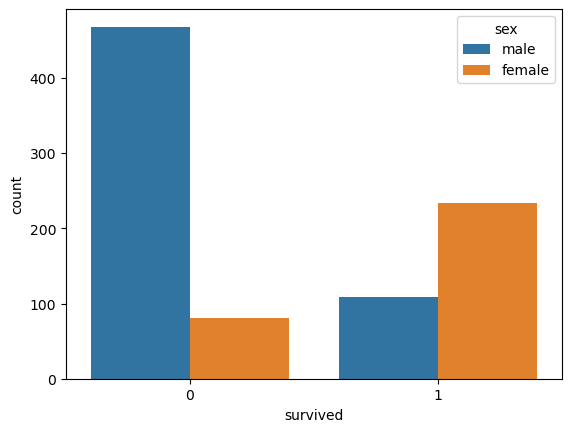

In [108]:
# Grafico de barras que muestra los que sobrevivieron y los que no, diferenciadolos por sexo
sns.countplot(data=df, x='survived', hue='sex')


In [136]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el dataset Iris
iris = load_iris()
X = iris.data # Características
y = iris.target # Etiquetas

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador KNN (K=1, por ejemplo)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador con los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN con K={k}: {accuracy : .2f}")

Precisión del modelo KNN con K=3:  1.00


In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
# Cargar el dataset Iris
iris = load_iris()
X = iris.data[:, :2] # Utilizamos solo las dos primerascaracterísticas para visualización
y = iris.target
# Crear el clasificador KNN (K=3, por ejemplo)
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador con todos los datos
knn_classifier.fit(X, y)
# Crear una malla para el gráfico de la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

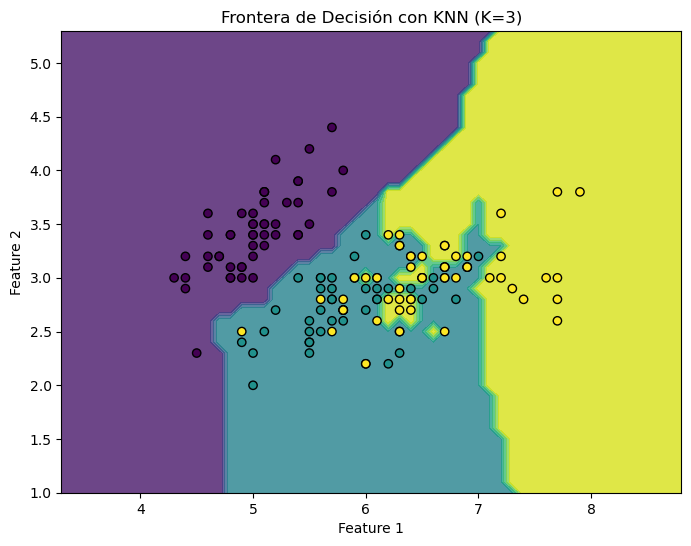

In [142]:
# Graficar la frontera de decisión y los puntos de datos
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontera de Decisión con KNN (K=3)')
plt.show()

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Descargar el conjunto de datos de crédito alemán desde una URL
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
column_names = [
    "Status_of_existing_checking_account",
    "Duration_in_month", "Credit_history", "Purpose",
    "Credit_amount", "Savings_account",
    "Present_employment_since", "Installment_rate",
    "Personal_status_and_sex", "Other_debtors",
    "Present_residence_since", "Property",
    "Age", "Other_installment_plans", "Housing",
    "Number_of_existing_credits", "Job",
    "Number_of_people_being_liable", "Telephone",
    "Foreign_worker", "Credit_approval"
]

In [146]:
# Cargar el conjunto de datos en un DataFrame de Pandas
data = pd.read_csv(url, delimiter=' ', header=None, names=column_names)
# Convertir variables categóricas usando One-Hot Encoding
categorical_cols = [
    "Status_of_existing_checking_account", "Credit_history", "Purpose",
    "Savings_account",
    "Present_employment_since", "Personal_status_and_sex", "Other_debtors",
    "Property",
    "Other_installment_plans", "Housing", "Job", "Telephone",
    "Foreign_worker"
]
numeric_cols = [col for col in data.columns if col not in categorical_cols
and col != "Credit_approval"]
# Aplicar One-Hot Encoding a las variables categóricas
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X = ct.fit_transform(data.drop('Credit_approval', axis=1))
# Separar características (X) y etiquetas (y)
y = data['Credit_approval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

Precisión del modelo KNN con K=5: 0.68


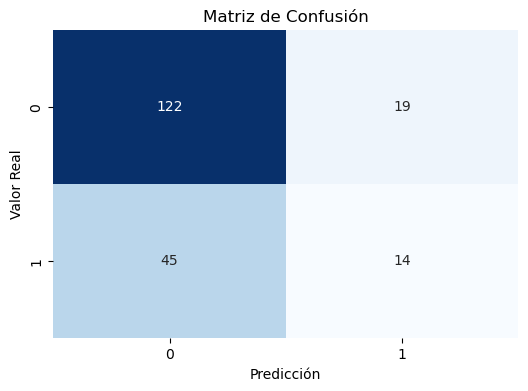

In [147]:
# Crear el clasificador KNN (K=5, por ejemplo)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador con los datos de entrenamiento
knn_classifier.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN con K={k}: {accuracy:.2f}")
# Matriz de confusión para evaluar el rendimiento del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show() 

Precisión del modelo KNN con K=5: 0.96


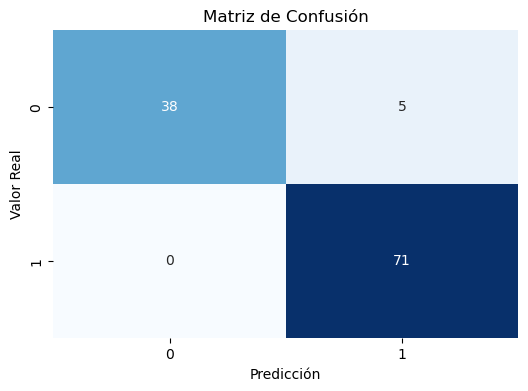

In [149]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el conjunto de datos de cáncer de mama desde sklearn
data = load_breast_cancer()
X = data.data # Características
y = data.target # Etiquetas (0 para tumor benigno, 1 para tumor maligno)
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Crear el clasificador KNN (K=5, por ejemplo)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador con los datos de entrenamiento
knn_classifier.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN con K={k}: {accuracy:.2f}")
# Matriz de confusión para evaluar el rendimiento del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Precisión del modelo KNN con K=5: 0.97


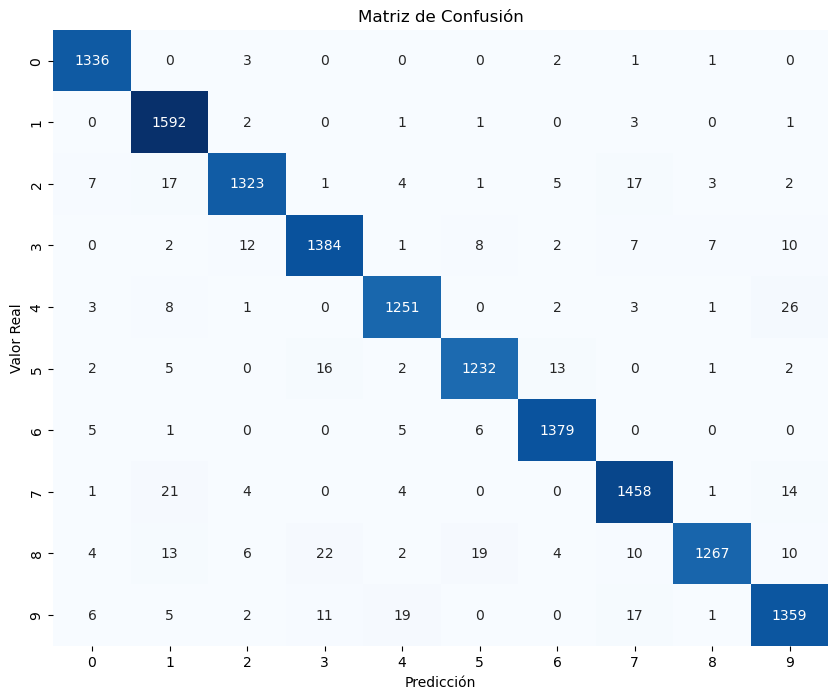

In [150]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784')
# Separar características (X) y etiquetas (y)
X = mnist.data
y = mnist.target
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Crear el clasificador KNN (K=5, por ejemplo)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador con los datos de entrenamiento
knn_classifier.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN con K={k}: {accuracy:.2f}")
# Matriz de confusión para evaluar el rendimiento del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784')
# Separar características (X) y etiquetas (y)
X = mnist.data
y = mnist.target

# Reducir las dimensiones a 2 utilizando PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Tomar un subconjunto más pequeño de los datos para entrenamiento (por ejemplo, 1000 muestras)
subset_size = 100  # tamaño del subconjunto
X_train_reduced = X_reduced[:subset_size]
y_train = y[:subset_size]

# Dividir el conjunto de datos reducido en entrenamiento y prueba
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_train_reduced, y_train, test_size=0.2, random_state=42)

# Crear el clasificador KNN
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador con los datos reducidos
knn_classifier.fit(X_train_reduced, y_train)

# Generar una malla de puntos para graficar la frontera de decisión
h = .5  # Tamaño de paso más grande para reducir la resolución
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir la clase para cada punto de la malla
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficar los puntos de entrenamiento
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train, palette="viridis", s=40, edgecolor='k', legend=None)
plt.title(f'Frontera de Decisión para KNN (K={k}) en espacio 2D (PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()
